In [1]:
# subplots are groups of smaller axes that can fit together on the same figure
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np

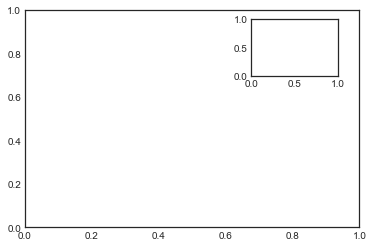

In [2]:
## Subplots by hand
ax1 = plt.axes()  # standard axes
ax2 = plt.axes([.65, .65, .2, .2])  # custom-positioned axes within original axes

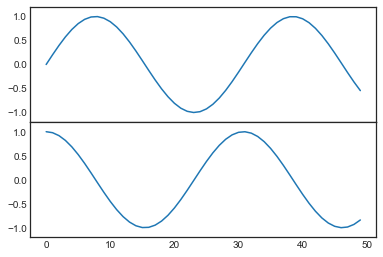

In [4]:
# equivalent in OOP approach
fig = plt.figure()
ax1 = fig.add_axes([.1, .5, .8, .4],   # numbers are [left, bottom, width, height]
                  xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([.1, .1, .8, .4],
                  ylim=(-1.2, 1.2))

x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x));

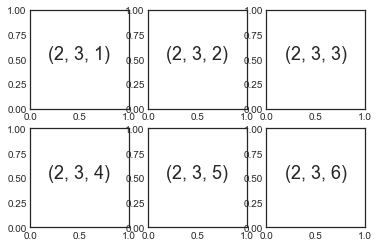

In [5]:
## Simple grids of subplots
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)),
            fontsize=18, ha='center')

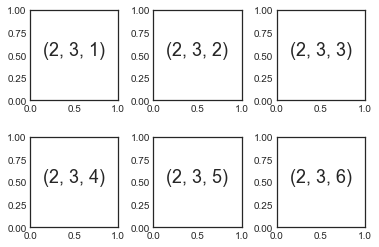

In [7]:
# can adjust spacing, as well as do OOP approach
fig = plt.figure()
fig.subplots_adjust(hspace=.4, wspace=.4)  # 40% of subplot width and height will be used for spacing
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.text(.5, .5, str((2, 3, i)),
           fontsize=18, ha='center')

In [8]:
## Whole grid in one go

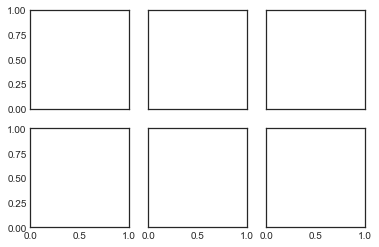

In [10]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')  # sharing axes remove the sub-labeling

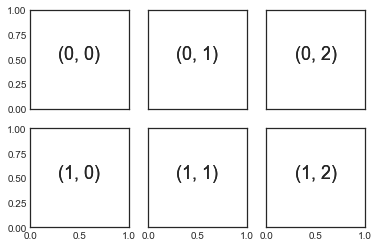

In [12]:
# indices are in a 2d array, [row, col]
for i in range(2):
    for j in range(3):
        ax[i, j].text(.5, .5, str((i, j)),
                     fontsize=18, ha='center')
fig

In [13]:
## More complicated arrangements

grid = plt.GridSpec(2, 3, wspace=.4, hspace=.3)

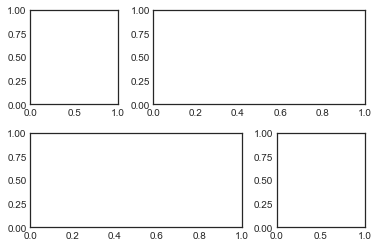

In [15]:
plt.subplot(grid[0, 0])
plt.subplot(grid[0, 1:])
plt.subplot(grid[1, :2])
plt.subplot(grid[1, 2]);

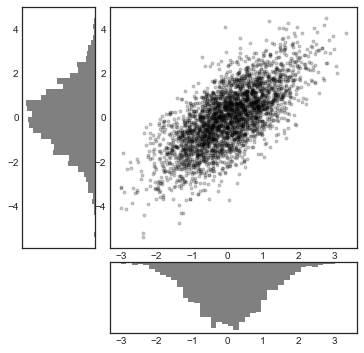

In [16]:
# create some normally distributed data
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

# setup the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace= .2, wspace=.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# scatter points on the main axes
main_ax.plot(x, y, 'ok', markersize=3, alpha=.2)

# historgram on the attached axes
x_hist.hist(x, 40, histtype='stepfilled',
           orientation='vertical', color='gray')
x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled',
           orientation='horizontal', color='gray')
y_hist.invert_xaxis()